In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

def print_umap_graph(umap_df):
    umap_data = pd.DataFrame(
        data = umap_df,
        columns=['umap-2d-one', 'umap-2d-two']
    )

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="umap-2d-one", y="umap-2d-two",
        palette=sns.color_palette("hls", 2),
        data=umap_data,
        legend="full",
        alpha=0.3
    )
    plt.show()

In [2]:
import pickle

with open('crafted/df_cleaned2.pickle', 'rb') as handle:
    df_cleaned2 = pickle.load(handle)
    
print(df_cleaned2.shape)
df_cleaned2.head()

(1056320, 25)


,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,date,type_credit,type_withdrawal,...,op_withdrawal_in_cash,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest
trans_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,3,12,24,4,1995-03-24,1,0,...,0,1000,1000,0,0,0,0,0,0,0
5,1,20,2,4,15,13,3,1995-04-13,1,0,...,0,3679,4679,0,0,0,0,0,0,0
6,1,30,2,5,19,13,5,1995-05-13,1,0,...,0,3679,20977,0,0,0,0,0,0,0
7,1,31,2,6,24,13,1,1995-06-13,1,0,...,0,3679,26835,0,0,0,0,0,0,0
8,1,30,2,7,28,13,3,1995-07-13,1,0,...,0,3679,30415,0,0,0,0,0,0,0


In [3]:
#df_scaled2 = StandardScaler().fit_transform(df_cleaned2.drop(columns=['date', 'account_id']))
#%time umap_1trans_df = umap.UMAP().fit_transform(df_scaled2)

In [4]:
with open('crafted/isolation_forest_1seq.pkl', 'rb') as handle:
    isolation_forests = pickle.load(handle)
    
print(type(isolation_forests))

/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator IsolationForest from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<class 'pyod.models.iforest.IForest'>


In [5]:
isolation_forests_outliers = np.where(isolation_forests.labels_ == 1)[0]
isolation_forests_inliers = np.where(isolation_forests.labels_ == 0)[0]

print(len(isolation_forests_inliers))
print(len(isolation_forests_outliers))

#plt.figure(figsize=(12,8))
#plt.scatter(*umap_1trans_df.T, s=15, linewidth=0, c='gray', alpha=0.25)
#plt.scatter(*umap_1trans_df[isolation_forests_outliers].T, s=15, linewidth=0, c='red', alpha=0.5)
#plt.show()

1024630
31690


In [6]:
outlying = df_cleaned2.iloc[isolation_forests_outliers,:]
outlying['anomaly'] = 1
inlying = df_cleaned2.iloc[isolation_forests_inliers,:]
inlying['anomaly'] = 0

features = pd.concat([outlying.iloc[:,:-1], inlying.iloc[:,:-1]], axis=0)
features = features.drop(columns=['account_id', 'date'])
labels = pd.concat([outlying.iloc[:,-1], inlying.iloc[:,-1]], axis=0)
print(features.shape, labels.shape)


/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1056320, 23) (1056320,)


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 199 to 3682987
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   date_days_from_last_trans   1056320 non-null  int64
 1   date_year                   1056320 non-null  int64
 2   date_month                  1056320 non-null  int64
 3   date_week                   1056320 non-null  int64
 4   date_day                    1056320 non-null  int64
 5   date_dayofweek              1056320 non-null  int64
 6   type_credit                 1056320 non-null  uint8
 7   type_withdrawal             1056320 non-null  uint8
 8   type_cash                   1056320 non-null  uint8
 9   op_credit_from_bank         1056320 non-null  uint8
 10  op_withdrawal_from_card     1056320 non-null  uint8
 11  op_credit_in_cash           1056320 non-null  uint8
 12  op_withdrawal_to_bank       1056320 non-null  uint8
 13  op_withdrawal_in_cash    

In [8]:
from sklearn.preprocessing import StandardScaler

features = pd.DataFrame(
    StandardScaler().fit_transform(features),
    index = features.index, 
    columns = features.columns
)

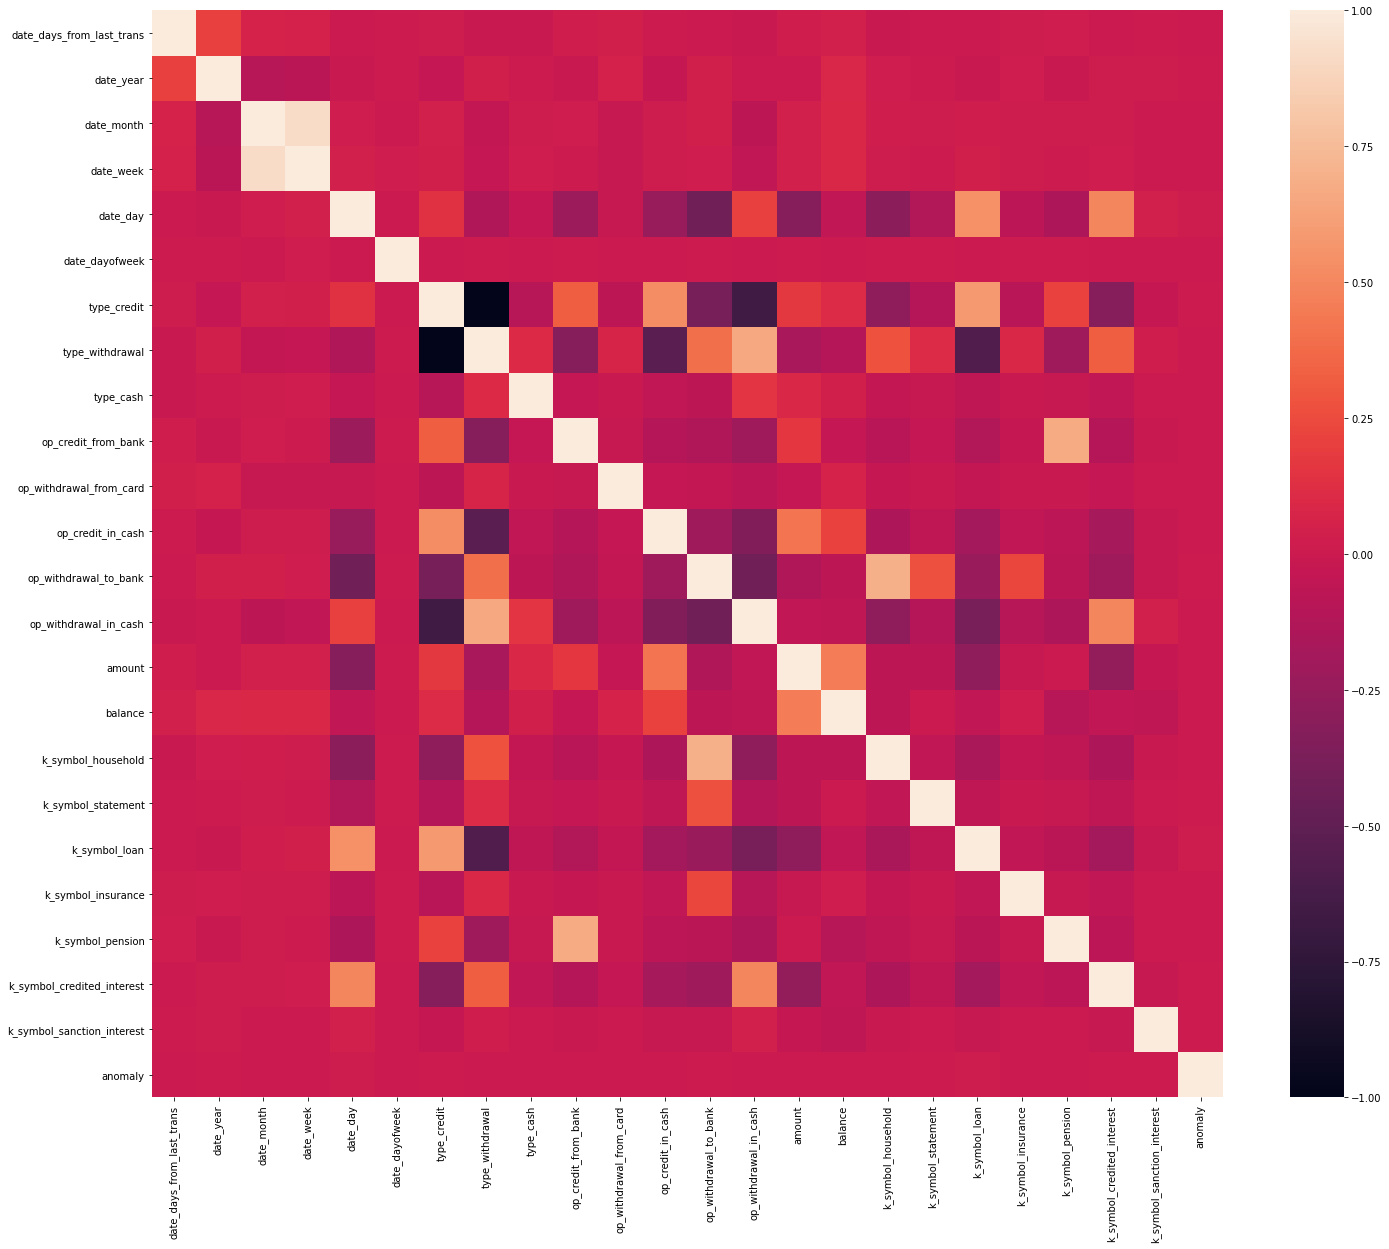

In [9]:
plt.figure(figsize=(24,20))
cor = pd.concat([features, labels], axis=1).corr(method='pearson')
sns.heatmap(cor)
plt.show()

In [10]:
X,y = features, labels

In [11]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(features, labels)

Feature ranking:
1. balance (0.340910)
2. amount (0.206070)
3. date_day (0.097050)
4. date_dayofweek (0.090555)
5. date_month (0.073655)
6. date_week (0.070851)
7. date_days_from_last_trans (0.058916)
8. date_year (0.052009)
9. k_symbol_household (0.002592)
10. type_cash (0.001185)
11. k_symbol_statement (0.001013)
12. k_symbol_credited_interest (0.000677)
13. op_withdrawal_in_cash (0.000598)
14. k_symbol_insurance (0.000572)
15. op_withdrawal_to_bank (0.000569)
16. k_symbol_pension (0.000537)
17. op_credit_in_cash (0.000482)
18. k_symbol_loan (0.000431)
19. op_credit_from_bank (0.000419)
20. op_withdrawal_from_card (0.000289)
21. type_credit (0.000232)
22. k_symbol_sanction_interest (0.000205)
23. type_withdrawal (0.000183)


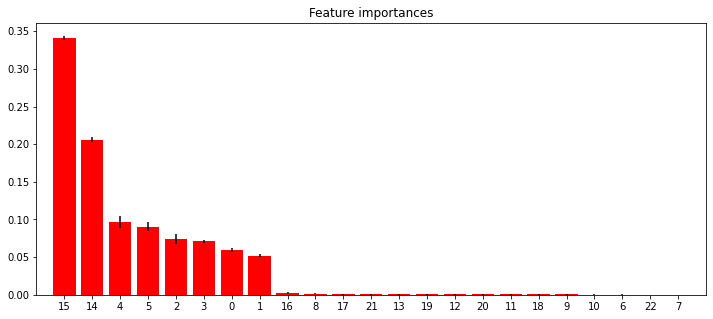

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(
    n_estimators=20,
    class_weight='balanced',
    random_state=0
)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

ordered_features = []
ordered_importances = []
for f in range(X.shape[1]):
    feature_name = X.columns[indices[f]]
    feature_importance = importances[indices[f]]
    print("%d. %s (%f)" % (f + 1, feature_name, feature_importance))
    ordered_features.append(feature_name)
    ordered_importances.append(feature_importance)

plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
features.columns[indices]

Index(['balance', 'amount', 'date_day', 'date_dayofweek', 'date_month',
       'date_week', 'date_days_from_last_trans', 'date_year',
       'k_symbol_household', 'type_cash', 'k_symbol_statement',
       'k_symbol_credited_interest', 'op_withdrawal_in_cash',
       'k_symbol_insurance', 'op_withdrawal_to_bank', 'k_symbol_pension',
       'op_credit_in_cash', 'k_symbol_loan', 'op_credit_from_bank',
       'op_withdrawal_from_card', 'type_credit', 'k_symbol_sanction_interest',
       'type_withdrawal'],
      dtype='object')

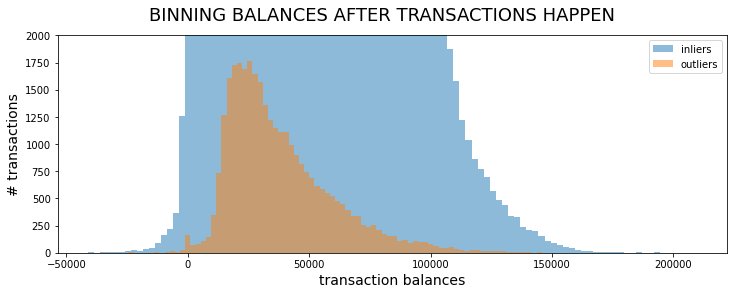

In [45]:
plt.figure(figsize=(12,4))

plt.hist(inlying['balance'], bins=100, alpha=0.5, label='inliers')
plt.hist(outlying['balance'], bins=100, alpha=0.5, label='outliers')

plt.ylim([0,2000])

plt.xlabel('transaction balances', size=14)
plt.ylabel('# transactions', size=14)
plt.suptitle('BINNING BALANCES AFTER TRANSACTIONS HAPPEN', size=18)
plt.legend(loc='upper right')

plt.show()

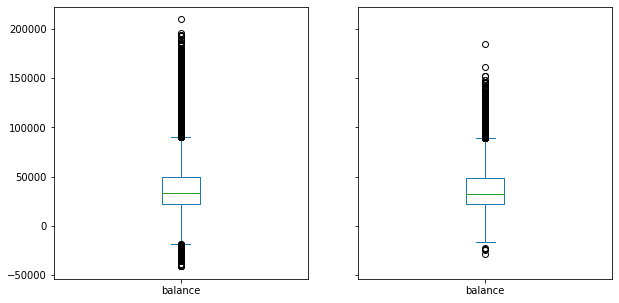

In [52]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
inlying[['balance']].plot.box(ax=axes[0])
outlying[['balance']].plot.box(ax=axes[1])
plt.show()

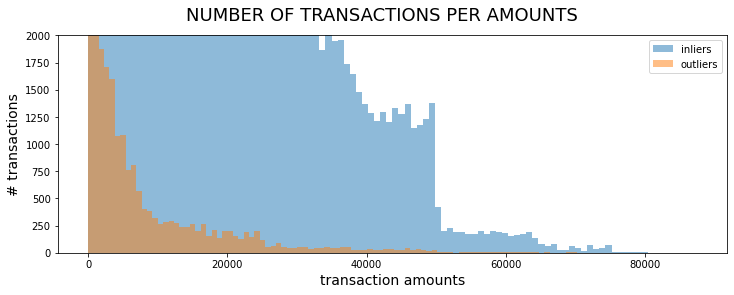

In [53]:
plt.figure(figsize=(12,4))

plt.hist(inlying['amount'], bins=100, alpha=0.5, label='inliers')
plt.hist(outlying['amount'], bins=100, alpha=0.5, label='outliers')

plt.ylim([0,2000])

plt.xlabel('transaction amounts', size=14)
plt.ylabel('# transactions', size=14)
plt.suptitle('NUMBER OF TRANSACTIONS PER AMOUNTS', size=18)
plt.legend(loc='upper right')

plt.show()

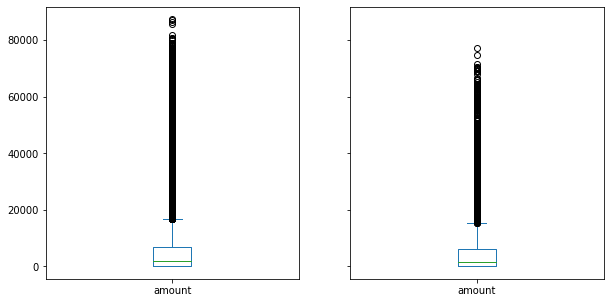

In [54]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
inlying[['amount']].plot.box(ax=axes[0])
outlying[['amount']].plot.box(ax=axes[1])
plt.show()

In [70]:
df_anomaly = pd.concat([outlying,inlying], axis=0)

outlier_amounts = df_anomaly.loc[df_anomaly['anomaly']==1,'amount']
inlier_amounts = df_anomaly.loc[df_anomaly['anomaly']==0,'amount']
outlier_balances = df_anomaly.loc[df_anomaly['anomaly']==1,'balance']
inlier_balances = df_anomaly.loc[df_anomaly['anomaly']==0,'balance']

print('outliers mean amount: ', outlier_amounts.mean())   #median
print('inliers mean amount: ', inlier_amounts.mean())   #median
print('outliers median amount: ', outlier_amounts.median())
print('inliers median amount: ', inlier_amounts.median())
print()
print('outliers mean balance: ', outlier_balances.mean())   #median
print('inliers mean balance: ', inlier_balances.mean())   #median
print('outliers median balance: ', outlier_balances.median())
print('inliers median balance: ', inlier_balances.median())
print()


outliers mean amount:  5506.556421584096
inliers mean amount:  5937.127962288826
outliers median amount:  1700.0
inliers median amount:  2100.0

outliers mean balance:  37927.500883559485
inliers mean balance:  38536.65395703815
outliers median balance:  32498.5
inliers median balance:  33160.0



In [71]:
info = pd.concat([
    outlier_amounts.describe(), inlier_amounts.describe(), 
    outlier_balances.describe(), inlier_balances.describe()
], axis=1)
info.columns = ['outlier amounts', 'inlier amounts', 'outlier_balances', 'inlier_balances']
info

,outlier amounts,inlier amounts,outlier_balances,inlier_balances
count,31690.000000,1.024630e+06,31690.000000,1.024630e+06
mean,5506.556422,5.937128e+03,37927.500884,3.853665e+04
std,9217.956604,9.531681e+03,21583.953274,2.213394e+04
min,0.000000,0.000000e+00,-28737.000000,-4.112600e+04
25%,118.000000,1.370000e+02,22157.000000,2.241000e+04
50%,1700.000000,2.100000e+03,32498.500000,3.316000e+04
75%,6276.000000,6.800000e+03,48896.500000,4.962500e+04
max,77100.000000,8.740000e+04,184168.000000,2.096370e+05


In [69]:
outlying.describe()

,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,type_credit,type_withdrawal,type_cash,...,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest,anomaly
count,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,...,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.0
mean,2904.007920,3.789587,3.517513,6.560019,26.519217,18.866993,2.999811,0.391543,0.608457,0.014358,...,5506.556422,37927.500884,0.109151,0.018807,0.195109,0.012338,0.022184,0.155002,0.001609,1.0
std,2434.696276,221.619471,1.380209,3.558336,15.533140,10.251380,2.009837,0.488103,0.488103,0.118963,...,9217.956604,21583.953274,0.311834,0.135846,0.396291,0.110392,0.147283,0.361912,0.040085,0.0
min,1.000000,-2160.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-28737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1239.000000,30.000000,3.000000,3.000000,13.000000,10.000000,1.000000,0.000000,0.000000,0.000000,...,118.000000,22157.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2417.000000,30.000000,4.000000,7.000000,27.000000,16.000000,3.000000,0.000000,1.000000,0.000000,...,1700.000000,32498.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3645.750000,31.000000,5.000000,10.000000,40.000000,30.000000,5.000000,1.000000,1.000000,0.000000,...,6276.000000,48896.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,11382.000000,1113.000000,5.000000,12.000000,53.000000,31.000000,6.000000,1.000000,1.000000,1.000000,...,77100.000000,184168.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [18]:
inlying.describe()

,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,type_credit,type_withdrawal,type_cash,...,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest,anomaly
count,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,...,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1.024630e+06,1024630.0
mean,2.937884e+03,5.319205e+00,3.499371e+00,6.573587e+00,2.656798e+01,1.833809e+01,3.007680e+00,3.832359e-01,6.167641e-01,1.582132e-02,...,5.937128e+03,3.853665e+04,1.118511e-01,1.747362e-02,1.726779e-01,1.287196e-02,2.892264e-02,1.472922e-01,1.489318e-03,0.0
std,2.478647e+03,2.228532e+02,1.397997e+00,3.583916e+00,1.565089e+01,1.019497e+01,2.005827e+00,4.861753e-01,4.861753e-01,1.247839e-01,...,9.531681e+03,2.213394e+04,3.151833e-01,1.310279e-01,3.779688e-01,1.127222e-01,1.675892e-01,3.543971e-01,3.856295e-02,0.0
min,1.000000e+00,-2.159000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-4.112600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.204000e+03,3.000000e+01,3.000000e+00,3.000000e+00,1.300000e+01,9.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.370000e+02,2.241000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.434000e+03,3.000000e+01,4.000000e+00,7.000000e+00,2.700000e+01,1.500000e+01,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.100000e+03,3.316000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,3.660000e+03,3.100000e+01,5.000000e+00,1.000000e+01,4.000000e+01,3.000000e+01,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,6.800000e+03,4.962500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,1.138200e+04,1.828000e+03,5.000000e+00,1.200000e+01,5.300000e+01,3.100000e+01,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.740000e+04,2.096370e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [19]:
cols = outlying.columns
print(cols)

Index(['account_id', 'date_days_from_last_trans', 'date_year', 'date_month',
       'date_week', 'date_day', 'date_dayofweek', 'date', 'type_credit',
       'type_withdrawal', 'type_cash', 'op_credit_from_bank',
       'op_withdrawal_from_card', 'op_credit_in_cash', 'op_withdrawal_to_bank',
       'op_withdrawal_in_cash', 'amount', 'balance', 'k_symbol_household',
       'k_symbol_statement', 'k_symbol_loan', 'k_symbol_insurance',
       'k_symbol_pension', 'k_symbol_credited_interest',
       'k_symbol_sanction_interest', 'anomaly'],
      dtype='object')


In [20]:
type_cols = ['type_withdrawal', 'type_credit']
categorical_features = pd.DataFrame(
    data = np.argmax(outlying[type_cols].values, axis=1),
    columns = ['type']
)

op_cols = ['op_credit_from_bank', 'op_withdrawal_from_card', 'op_credit_in_cash', 'op_withdrawal_to_bank', 'op_withdrawal_in_cash']
categorical_features['operation'] = np.argmax(outlying[op_cols].values, axis=1)

k_symbol_cols = ['k_symbol_household', 'k_symbol_statement', 'k_symbol_loan', 'k_symbol_insurance', 'k_symbol_pension', 'k_symbol_credited_interest', 'k_symbol_sanction_interest']
categorical_features['k_symbol'] = np.argmax(outlying[k_symbol_cols].values, axis=1)

categorical_features


,type,operation,k_symbol
0,1,2,0
1,0,3,0
2,0,4,0
3,0,4,0
4,0,4,0
...,...,...,...
31685,1,0,2
31686,1,0,2
31687,1,0,2
31688,1,0,2


<AxesSubplot:>

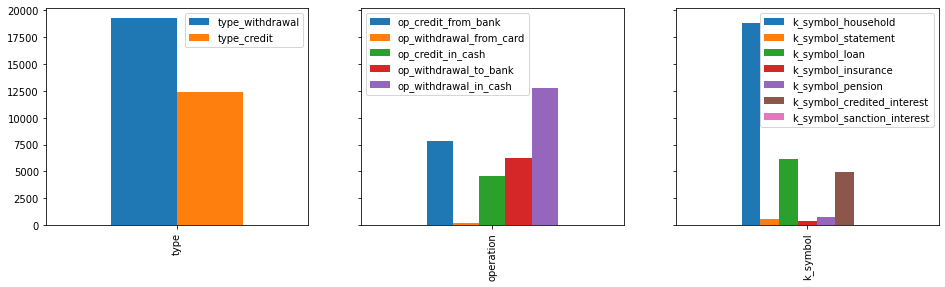

In [72]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)

pd.DataFrame(
    data = [categorical_features['type'].value_counts().sort_index().values],
    columns = type_cols,
    index = ['type']
).plot.bar(ax = axes[0])

pd.DataFrame(
    data = [categorical_features['operation'].value_counts().sort_index().values],
    columns = op_cols,
    index = ['operation']
).plot.bar(ax = axes[1])

pd.DataFrame(
    data = [categorical_features['k_symbol'].value_counts().sort_index().values],
    columns = k_symbol_cols,
    index = ['k_symbol']
).plot.bar(ax = axes[2])



In [22]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

def print_umap_graph(umap_df):
    umap_data = pd.DataFrame(
        data = umap_df,
        columns=['umap-2d-one', 'umap-2d-two']
    )

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="umap-2d-one", y="umap-2d-two",
        palette=sns.color_palette("hls", 2),
        data=umap_data,
        legend="full",
        alpha=0.3
    )
    plt.show()


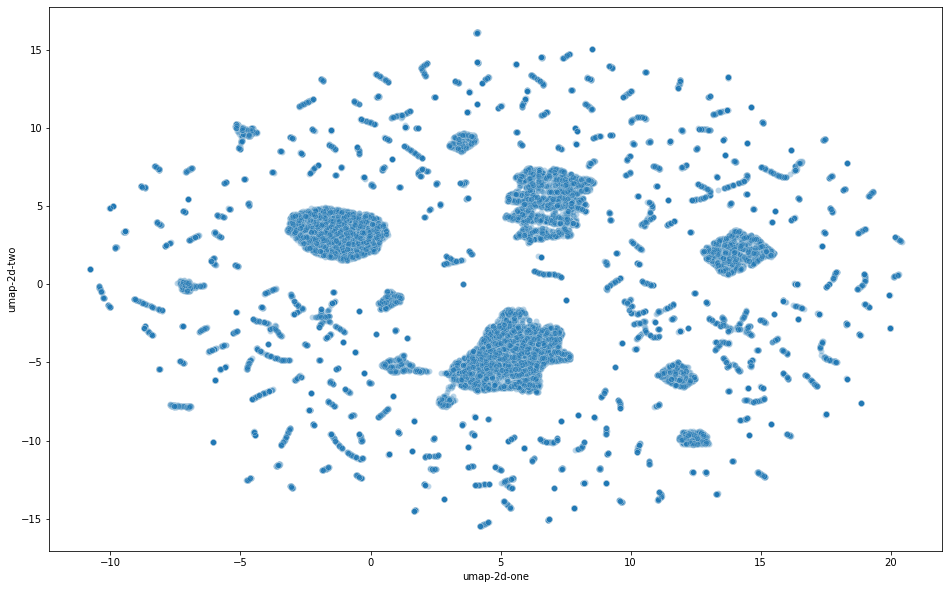

In [23]:
data = outlying.drop(columns=['account_id', 'date'])

scaled_data = StandardScaler().fit_transform(data)
umap_viz = umap.UMAP().fit_transform(scaled_data)
print_umap_graph(umap_viz)

In [24]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=100).fit(data)
clusterer.labels_

array([-1, -1,  2, ..., -1,  2,  2])

In [25]:
print(len(set(clusterer.labels_)))

clusters = []
for label in set(clusterer.labels_):
    clusters.append(np.where(clusterer.labels_ == label)[0])


4


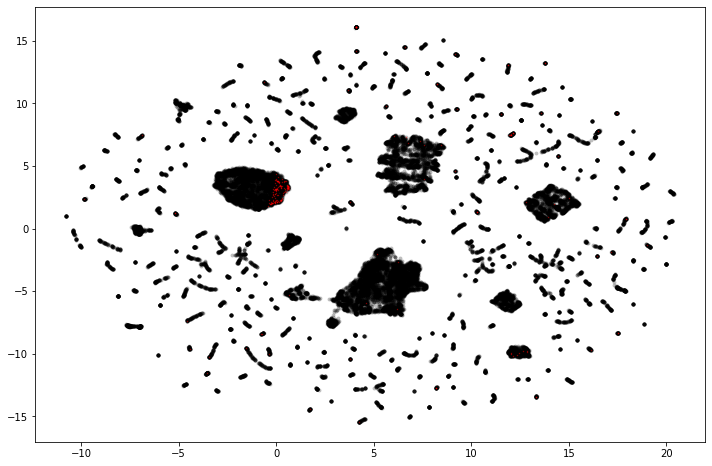

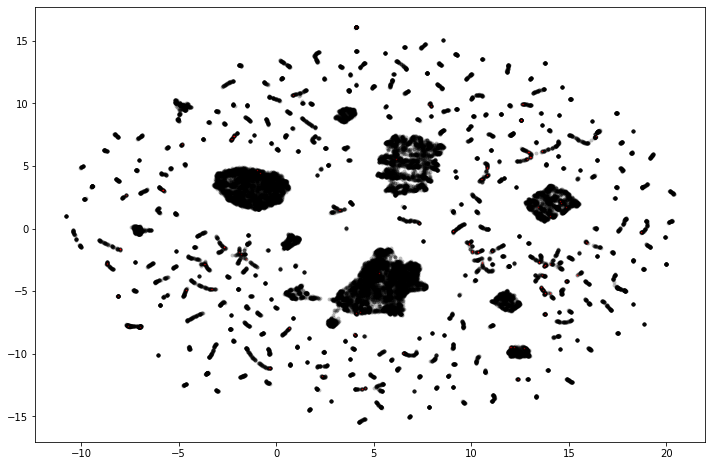

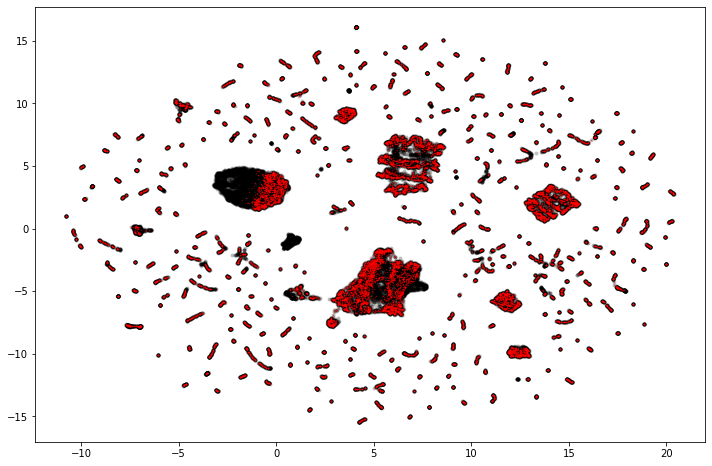

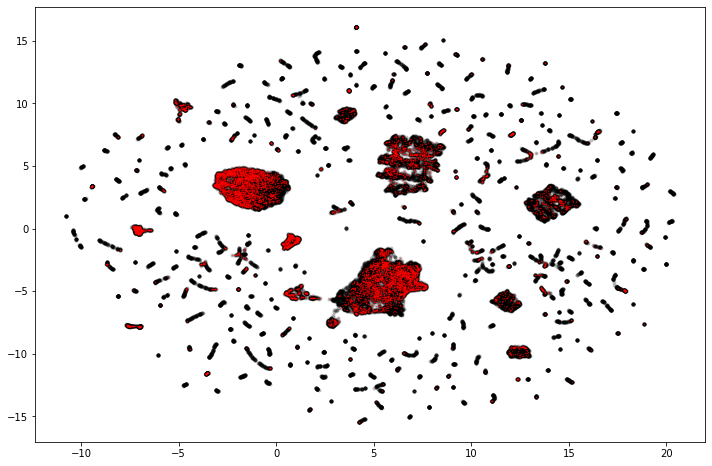

In [26]:
for i in range(len(set(clusterer.labels_))):
    plt.figure(figsize=(12,8))
    plt.scatter(*umap_viz.T, s=15, linewidth=0, c='black', alpha=0.25)
    plt.scatter(*umap_viz[clusters[i]].T, s=2, linewidth=0, c='red', alpha=0.5)
    plt.show()

In [27]:
for i, cluster in enumerate(clusters):
    print(i, len(cluster))

0 232
1 134
2 21210
3 10114


In [28]:
outlying.iloc[clusters[1],:].describe()

,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,type_credit,type_withdrawal,type_cash,...,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest,anomaly
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.0,134.000000,134.000000,134.0
mean,3195.977612,22.835821,3.992537,7.126866,29.604478,28.104478,3.365672,0.589552,0.410448,0.0,...,240.694030,75431.462687,0.007463,0.029851,0.574627,0.0,0.0,0.291045,0.007463,1.0
std,2537.706375,63.908557,1.107027,3.475849,15.565056,6.863074,2.016999,0.493761,0.493761,0.0,...,220.345294,1001.589509,0.086387,0.170814,0.496255,0.0,0.0,0.455949,0.086387,0.0
min,7.000000,-691.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,...,15.000000,72232.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
25%,1234.750000,30.000000,3.000000,4.000000,18.000000,30.000000,2.000000,0.000000,0.000000,0.0,...,17.750000,74630.500000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
50%,2689.000000,31.000000,4.000000,7.500000,31.000000,31.000000,3.500000,1.000000,0.000000,0.0,...,281.500000,75390.500000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.0
75%,4133.250000,31.000000,5.000000,10.000000,44.000000,31.000000,5.000000,1.000000,1.000000,0.0,...,314.000000,76220.250000,0.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000,1.0
max,10789.000000,31.000000,5.000000,12.000000,53.000000,31.000000,6.000000,1.000000,1.000000,0.0,...,1100.000000,77536.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.0


In [29]:
outlying.iloc[clusters[2],:].describe()

,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,type_credit,type_withdrawal,type_cash,...,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest,anomaly
count,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,...,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.0
mean,2675.764404,22.837954,3.522254,6.456719,26.076426,20.980575,3.002593,0.372702,0.627298,0.002970,...,1427.950919,30540.799764,0.112966,0.023008,0.266007,0.011174,0.028949,0.213248,0.000896,1.0
std,2254.412803,126.070854,1.345042,3.570503,15.596425,10.338616,2.016445,0.483535,0.483535,0.054421,...,1909.116032,13095.987390,0.316558,0.149932,0.441878,0.105117,0.167666,0.409611,0.029917,0.0
min,2.000000,-1334.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8952.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1106.000000,30.000000,3.000000,3.000000,13.000000,11.000000,1.000000,0.000000,0.000000,0.000000,...,70.000000,20606.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2292.500000,31.000000,4.000000,7.000000,27.000000,28.000000,3.000000,0.000000,1.000000,0.000000,...,262.000000,27747.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3492.000000,31.000000,5.000000,10.000000,40.000000,31.000000,5.000000,1.000000,1.000000,0.000000,...,2400.000000,37930.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,11362.000000,800.000000,5.000000,12.000000,53.000000,31.000000,6.000000,1.000000,1.000000,1.000000,...,8500.000000,71954.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [30]:
outlying.iloc[clusters[3],:].describe()

,account_id,date_days_from_last_trans,date_year,date_month,date_week,date_day,date_dayofweek,type_credit,type_withdrawal,type_cash,...,amount,balance,k_symbol_household,k_symbol_statement,k_symbol_loan,k_symbol_insurance,k_symbol_pension,k_symbol_credited_interest,k_symbol_sanction_interest,anomaly
count,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,...,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.0
mean,3363.826083,-35.081273,3.519972,6.771900,27.413981,14.323907,2.995847,0.419616,0.580384,0.038758,...,14241.572869,53769.654439,0.104212,0.009492,0.042614,0.015226,0.008800,0.032925,0.002076,1.0
std,2705.281058,340.737249,1.441378,3.526072,15.366931,8.439083,1.996383,0.493521,0.493521,0.193028,...,12103.376240,26165.195046,0.305550,0.096967,0.201996,0.122458,0.093398,0.178448,0.045522,0.0
min,1.000000,-2160.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-28737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1490.000000,28.000000,3.000000,4.000000,15.000000,8.000000,1.000000,0.000000,0.000000,0.000000,...,5269.500000,36654.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2701.000000,30.000000,4.000000,7.000000,28.000000,12.000000,3.000000,0.000000,1.000000,0.000000,...,11424.000000,51793.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3999.000000,31.000000,5.000000,10.000000,41.000000,20.000000,5.000000,1.000000,1.000000,0.000000,...,20081.000000,70364.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,11382.000000,1113.000000,5.000000,12.000000,53.000000,31.000000,6.000000,1.000000,1.000000,1.000000,...,77100.000000,184168.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [31]:
categorical_features_outlier_cluster0 = pd.DataFrame(
    data = np.argmax(outlying.iloc[clusters[0],:][type_cols].values, axis=1),
    columns = ['type']
)
categorical_features_outlier_cluster0['operation'] = np.argmax(outlying.iloc[clusters[0],:][op_cols].values, axis=1)
categorical_features_outlier_cluster0['k_symbol'] = np.argmax(outlying.iloc[clusters[0],:][k_symbol_cols].values, axis=1)
print(len(categorical_features_outlier_cluster0))


categorical_features_outlier_cluster1 = pd.DataFrame(
    data = np.argmax(outlying.iloc[clusters[1],:][type_cols].values, axis=1),
    columns = ['type']
)
categorical_features_outlier_cluster1['operation'] = np.argmax(outlying.iloc[clusters[1],:][op_cols].values, axis=1)
categorical_features_outlier_cluster1['k_symbol'] = np.argmax(outlying.iloc[clusters[1],:][k_symbol_cols].values, axis=1)
print(len(categorical_features_outlier_cluster1))


categorical_features_outlier_cluster2 = pd.DataFrame(
    data = np.argmax(outlying.iloc[clusters[2],:][type_cols].values, axis=1),
    columns = ['type']
)
categorical_features_outlier_cluster2['operation'] = np.argmax(outlying.iloc[clusters[2],:][op_cols].values, axis=1)
categorical_features_outlier_cluster2['k_symbol'] = np.argmax(outlying.iloc[clusters[2],:][k_symbol_cols].values, axis=1)
print(len(categorical_features_outlier_cluster2))


categorical_features_outlier_cluster3 = pd.DataFrame(
    data = np.argmax(outlying.iloc[clusters[3],:][type_cols].values, axis=1),
    columns = ['type']
)
categorical_features_outlier_cluster3['operation'] = np.argmax(outlying.iloc[clusters[3],:][op_cols].values, axis=1)
categorical_features_outlier_cluster3['k_symbol'] = np.argmax(outlying.iloc[clusters[3],:][k_symbol_cols].values, axis=1)
print(len(categorical_features_outlier_cluster3))


232
134
21210
10114


In [32]:
c = categorical_features_outlier_cluster0['operation'].value_counts()
c[1] = 0
c.sort_index()

0     33
1      0
2    147
3     19
4     33
Name: operation, dtype: int64

In [33]:
categorical_features_outlier_cluster1['k_symbol'].value_counts()

2    77
5    39
0    13
1     4
6     1
Name: k_symbol, dtype: int64

<AxesSubplot:>

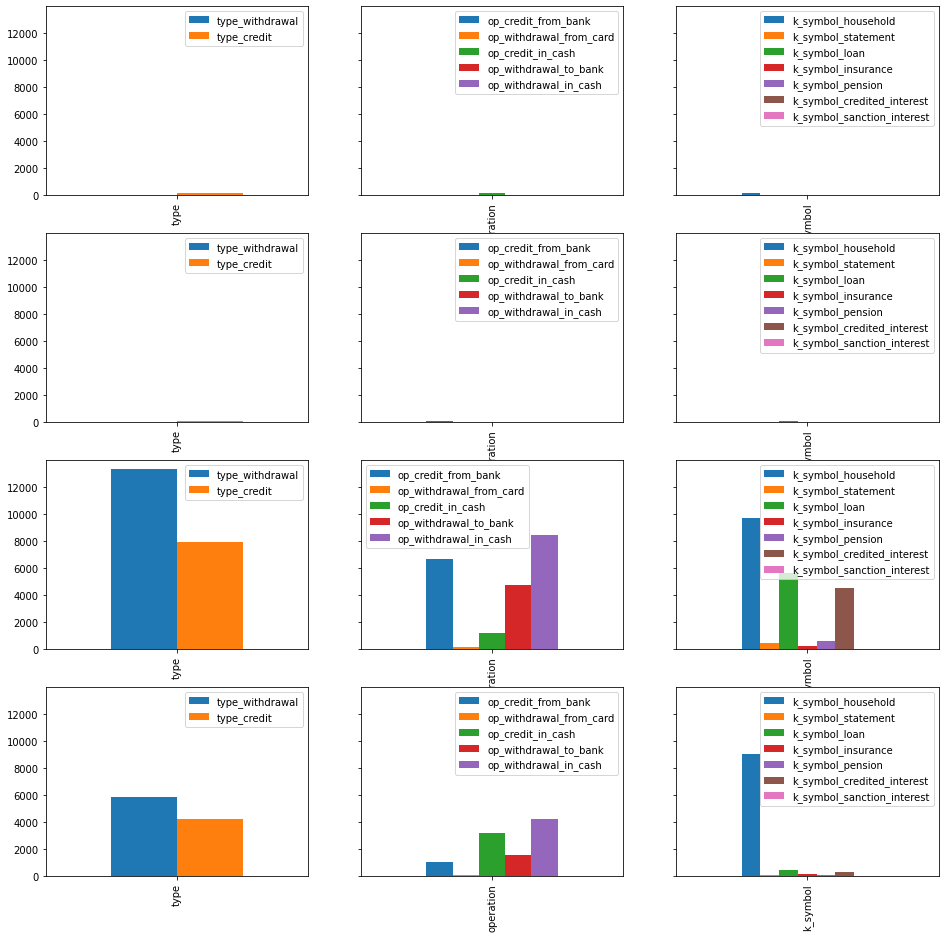

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16), sharey=True)

pd.DataFrame(
    data = [categorical_features_outlier_cluster0['type'].value_counts().sort_index().values],
    columns = type_cols,
    index = ['type']
).plot.bar(ax = axes[0,0])
c = categorical_features_outlier_cluster0['operation'].value_counts()
c[1] = 0
pd.DataFrame(
    data = [c.sort_index().values],
    columns = op_cols,
    index = ['operation']
).plot.bar(ax = axes[0,1])
c = categorical_features_outlier_cluster0['k_symbol'].value_counts()
c[3] = 0
c[4] = 0
pd.DataFrame(
    data = [c.sort_index().values],
    columns = k_symbol_cols,
    index = ['k_symbol']
).plot.bar(ax = axes[0,2])


pd.DataFrame(
    data = [categorical_features_outlier_cluster1['type'].value_counts().sort_index().values],
    columns = type_cols,
    index = ['type']
).plot.bar(ax = axes[1,0])
pd.DataFrame(
    data = [categorical_features_outlier_cluster1['operation'].value_counts().sort_index().values],
    columns = op_cols,
    index = ['operation']
).plot.bar(ax = axes[1,1])
c = categorical_features_outlier_cluster1['k_symbol'].value_counts()
c[3] = 0
c[4] = 0
pd.DataFrame(
    data = [c.sort_index().values],
    columns = k_symbol_cols,
    index = ['k_symbol']
).plot.bar(ax = axes[1,2])


pd.DataFrame(
    data = [categorical_features_outlier_cluster2['type'].value_counts().sort_index().values],
    columns = type_cols,
    index = ['type']
).plot.bar(ax = axes[2,0])
pd.DataFrame(
    data = [categorical_features_outlier_cluster2['operation'].value_counts().sort_index().values],
    columns = op_cols,
    index = ['operation']
).plot.bar(ax = axes[2,1])
pd.DataFrame(
    data = [categorical_features_outlier_cluster2['k_symbol'].value_counts().sort_index().values],
    columns = k_symbol_cols,
    index = ['k_symbol']
).plot.bar(ax = axes[2,2])


pd.DataFrame(
    data = [categorical_features_outlier_cluster3['type'].value_counts().sort_index().values],
    columns = type_cols,
    index = ['type']
).plot.bar(ax = axes[3,0])
pd.DataFrame(
    data = [categorical_features_outlier_cluster3['operation'].value_counts().sort_index().values],
    columns = op_cols,
    index = ['operation']
).plot.bar(ax = axes[3,1])
pd.DataFrame(
    data = [categorical_features_outlier_cluster3['k_symbol'].value_counts().sort_index().values],
    columns = k_symbol_cols,
    index = ['k_symbol']
).plot.bar(ax = axes[3,2])



<AxesSubplot:ylabel='Frequency'>

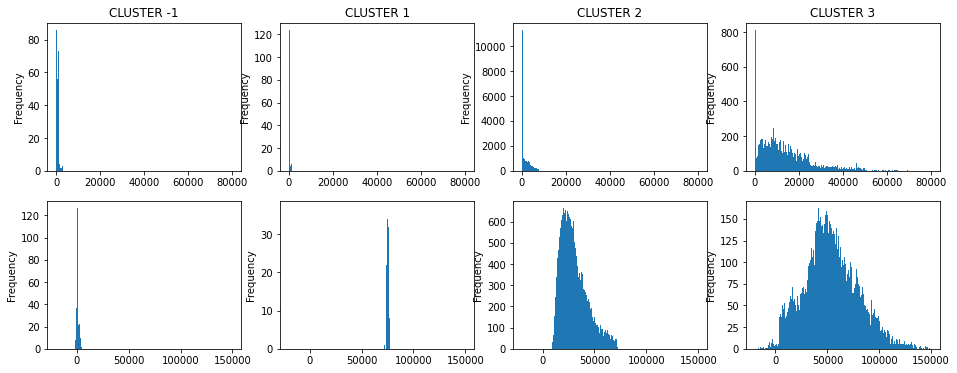

In [78]:
fig, axes = plt.subplots(2,4, figsize=(16,6))

outlying.iloc[clusters[0],:]['amount'].plot.hist(bins=200, ax=axes[0,0], range=(0,80000), title='CLUSTER -1')
outlying.iloc[clusters[1],:]['amount'].plot.hist(bins=200, ax=axes[0,1], range=(0,80000), title='CLUSTER 1')
outlying.iloc[clusters[2],:]['amount'].plot.hist(bins=200, ax=axes[0,2], range=(0,80000), title='CLUSTER 2')
outlying.iloc[clusters[3],:]['amount'].plot.hist(bins=200, ax=axes[0,3], range=(0,80000), title='CLUSTER 3')

outlying.iloc[clusters[0],:]['balance'].plot.hist(bins=200, ax=axes[1,0], range=(-20000, 150000))
outlying.iloc[clusters[1],:]['balance'].plot.hist(bins=200, ax=axes[1,1], range=(-20000, 150000))
outlying.iloc[clusters[2],:]['balance'].plot.hist(bins=200, ax=axes[1,2], range=(-20000, 150000))
outlying.iloc[clusters[3],:]['balance'].plot.hist(bins=200, ax=axes[1,3], range=(-20000, 150000))



In [81]:
outlying['date_days_from_last_trans']

trans_id
199       -1317
473          30
584          -2
586          10
592         -84
           ... 
3682194      31
3682296      30
3682623      31
3682635      31
3682659      31
Name: date_days_from_last_trans, Length: 31690, dtype: int64

In [35]:
def find_similar_transactions(transaction_id):
    

SyntaxError: unexpected EOF while parsing (1481340357.py, line 2)

## Analysis over 2-length transactions

In [73]:
import pickle

with open('crafted/sequences_2trans.pickle', 'rb') as handle:
    sequences_2trans = pickle.load(handle)
    
print(sequences_2trans.shape)
sequences_2trans.head()

(1051820, 42)


,0_date_days_from_last_trans,0_date_year,0_date_month,0_date_day,0_date_dayofweek,0_type_credit,0_type_cash,0_op_credit_from_bank,0_op_withdrawal_from_card,0_op_credit_in_cash,...,1_op_withdrawal_in_cash,1_amount,1_balance,1_k_symbol_household,1_k_symbol_statement,1_k_symbol_loan,1_k_symbol_insurance,1_k_symbol_pension,1_k_symbol_credited_interest,1_k_symbol_sanction_interest
0,0,2,3,24,4,1,0,0,0,1,...,0,3679,4679,0,0,0,0,0,0,0
1,20,2,4,13,3,1,0,1,0,0,...,0,3679,20977,0,0,0,0,0,0,0
2,30,2,5,13,5,1,0,1,0,0,...,0,3679,26835,0,0,0,0,0,0,0
3,31,2,6,13,1,1,0,1,0,0,...,0,3679,30415,0,0,0,0,0,0,0
4,30,2,7,13,3,1,0,1,0,0,...,0,3679,28903,0,0,0,0,0,0,0


In [ ]:
sequences_2trans_scaled = StandardScaler().fit_transform(sequences_2trans.drop(columns=['date', 'account_id']))
%time umap_2trans_df = umap.UMAP().fit_transform(sequences_2trans_scaled)

In [74]:
with open('crafted/isolation_forest_2seq.pkl', 'rb') as handle:
    isolation_forests2 = pickle.load(handle)
    
print(type(isolation_forests2))

<class 'pyod.models.iforest.IForest'>


/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator IsolationForest from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [76]:
isolation_forests_outliers2 = np.where(isolation_forests2.labels_ == 1)[0]
isolation_forests_inliers2 = np.where(isolation_forests2.labels_ == 0)[0]

print(len(isolation_forests_inliers2))
print(len(isolation_forests_outliers2))

#plt.figure(figsize=(12,8))
#plt.scatter(*umap_1trans_df.T, s=15, linewidth=0, c='gray', alpha=0.25)
#plt.scatter(*umap_1trans_df[isolation_forests_outliers].T, s=15, linewidth=0, c='red', alpha=0.5)
#plt.show()

1020265
31555


In [78]:
outlying2 = sequences_2trans.iloc[isolation_forests_outliers2,:]
outlying2['anomaly'] = 1
inlying2 = sequences_2trans.iloc[isolation_forests_inliers2,:]
inlying2['anomaly'] = 0

features2 = pd.concat([outlying2.iloc[:,:-1], inlying2.iloc[:,:-1]], axis=0)
labels2 = pd.concat([outlying2.iloc[:,-1], inlying2.iloc[:,-1]], axis=0)
print(features2.shape, labels2.shape)


/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/one/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1051820, 42) (1051820,)


In [79]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051820 entries, 161 to 1051819
Data columns (total 42 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   0_date_days_from_last_trans   1051820 non-null  object
 1   0_date_year                   1051820 non-null  object
 2   0_date_month                  1051820 non-null  object
 3   0_date_day                    1051820 non-null  object
 4   0_date_dayofweek              1051820 non-null  object
 5   0_type_credit                 1051820 non-null  object
 6   0_type_cash                   1051820 non-null  object
 7   0_op_credit_from_bank         1051820 non-null  object
 8   0_op_withdrawal_from_card     1051820 non-null  object
 9   0_op_credit_in_cash           1051820 non-null  object
 10  0_op_withdrawal_to_bank       1051820 non-null  object
 11  0_op_withdrawal_in_cash       1051820 non-null  object
 12  0_amount                      1051820 no

In [80]:
from sklearn.preprocessing import StandardScaler

features2 = pd.DataFrame(
    StandardScaler().fit_transform(features2),
    index = features2.index, 
    columns = features2.columns
)

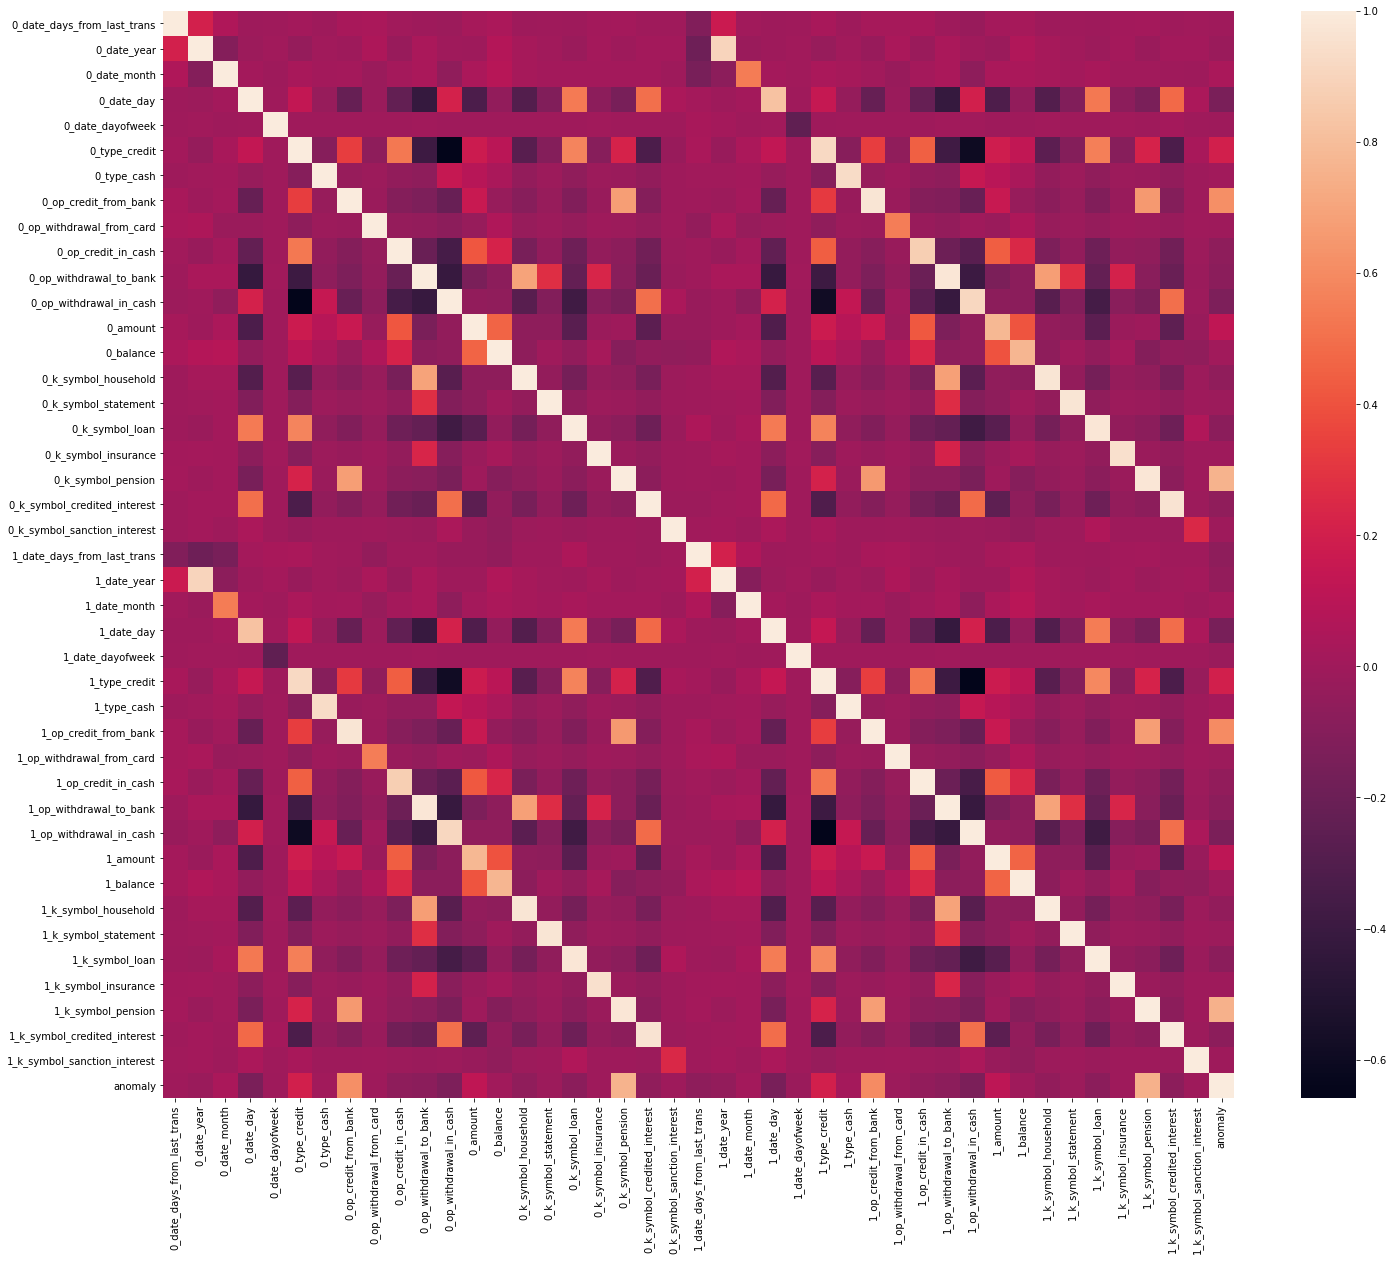

In [81]:
plt.figure(figsize=(24,20))
cor = pd.concat([features2, labels2], axis=1).corr(method='pearson')
sns.heatmap(cor)
plt.show()

In [82]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X2, y2 = oversample.fit_resample(features2, labels2)

Feature ranking:
1. 1_op_credit_from_bank (0.178681)
2. 0_op_credit_from_bank (0.129843)
3. 1_k_symbol_pension (0.091728)
4. 1_type_credit (0.090775)
5. 0_k_symbol_pension (0.086650)
6. 0_amount (0.029515)
7. 0_op_credit_in_cash (0.029088)
8. 1_k_symbol_loan (0.027467)
9. 0_date_day (0.026791)
10. 1_op_withdrawal_in_cash (0.026728)
11. 0_type_credit (0.023265)
12. 0_op_withdrawal_in_cash (0.021739)
13. 1_date_year (0.021643)
14. 0_k_symbol_loan (0.021313)
15. 1_amount (0.019554)
16. 1_type_cash (0.019386)
17. 0_balance (0.017514)
18. 1_date_days_from_last_trans (0.017278)
19. 1_balance (0.016508)
20. 1_op_credit_in_cash (0.012457)
21. 0_op_withdrawal_to_bank (0.011999)
22. 0_k_symbol_credited_interest (0.011481)
23. 0_date_year (0.010148)
24. 0_date_days_from_last_trans (0.008705)
25. 0_k_symbol_household (0.006056)
26. 0_date_month (0.005588)
27. 0_type_cash (0.005095)
28. 1_date_day (0.005090)
29. 1_date_dayofweek (0.004990)
30. 1_date_month (0.004865)
31. 0_date_dayofweek (0.004283)

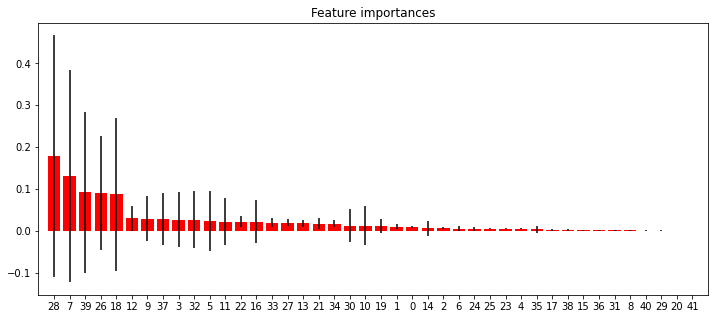

In [83]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(
    n_estimators=20,
    class_weight='balanced',
    random_state=0
)

forest.fit(X2, y2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

ordered_features = []
ordered_importances = []
for f in range(X2.shape[1]):
    feature_name = X2.columns[indices[f]]
    feature_importance = importances[indices[f]]
    print("%d. %s (%f)" % (f + 1, feature_name, feature_importance))
    ordered_features.append(feature_name)
    ordered_importances.append(feature_importance)

plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), indices)
plt.xlim([-1, X2.shape[1]])
plt.show()

In [84]:
features.columns[indices]

Index(['1_op_credit_from_bank', '0_op_credit_from_bank', '1_k_symbol_pension',
       '1_type_credit', '0_k_symbol_pension', '0_amount',
       '0_op_credit_in_cash', '1_k_symbol_loan', '0_date_day',
       '1_op_withdrawal_in_cash', '0_type_credit', '0_op_withdrawal_in_cash',
       '1_date_year', '0_k_symbol_loan', '1_amount', '1_type_cash',
       '0_balance', '1_date_days_from_last_trans', '1_balance',
       '1_op_credit_in_cash', '0_op_withdrawal_to_bank',
       '0_k_symbol_credited_interest', '0_date_year',
       '0_date_days_from_last_trans', '0_k_symbol_household', '0_date_month',
       '0_type_cash', '1_date_day', '1_date_dayofweek', '1_date_month',
       '0_date_dayofweek', '1_k_symbol_household', '0_k_symbol_insurance',
       '1_k_symbol_insurance', '0_k_symbol_statement', '1_k_symbol_statement',
       '1_op_withdrawal_to_bank', '0_op_withdrawal_from_card',
       '1_k_symbol_credited_interest', '1_op_withdrawal_from_card',
       '0_k_symbol_sanction_interest', '1_k_

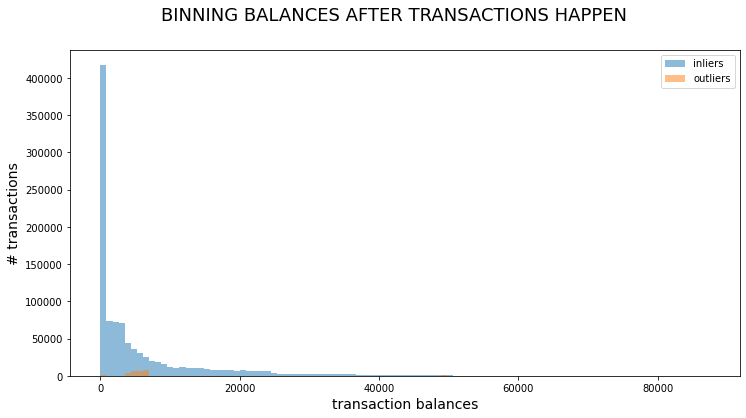

In [87]:
plt.figure(figsize=(12,6))

plt.hist(inlying2['0_amount'], bins=100, alpha=0.5, label='inliers')
plt.hist(outlying2['0_amount'], bins=100, alpha=0.5, label='outliers')

#plt.ylim([0,2000])

plt.xlabel('transaction balances', size=14)
plt.ylabel('# transactions', size=14)
plt.suptitle('BINNING BALANCES AFTER TRANSACTIONS HAPPEN', size=18)
plt.legend(loc='upper right')

plt.show()